In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('./CovidData.csv')

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


Hapus Medical Unit karena tidak dibutuhkan

In [4]:
df.drop(columns=['MEDICAL_UNIT'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   SEX                   1048575 non-null  int64 
 2   PATIENT_TYPE          1048575 non-null  int64 
 3   DATE_DIED             1048575 non-null  object
 4   INTUBED               1048575 non-null  int64 
 5   PNEUMONIA             1048575 non-null  int64 
 6   AGE                   1048575 non-null  int64 
 7   PREGNANT              1048575 non-null  int64 
 8   DIABETES              1048575 non-null  int64 
 9   COPD                  1048575 non-null  int64 
 10  ASTHMA                1048575 non-null  int64 
 11  INMSUPR               1048575 non-null  int64 
 12  HIPERTENSION          1048575 non-null  int64 
 13  OTHER_DISEASE         1048575 non-null  int64 
 14  CARDIOVASCULAR        1048575 non-null  int64 
 15

97 dan 98 adalah missing values, maka data harus di normalisasi atau dibersihkan dengan cara menghapus baris yang mengadung value 97 dan 98

In [5]:
mask = df.isin([97, 98])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   SEX                   1048575 non-null  int64 
 2   PATIENT_TYPE          1048575 non-null  int64 
 3   DATE_DIED             1048575 non-null  object
 4   INTUBED               1048575 non-null  int64 
 5   PNEUMONIA             1048575 non-null  int64 
 6   AGE                   1048575 non-null  int64 
 7   PREGNANT              1048575 non-null  int64 
 8   DIABETES              1048575 non-null  int64 
 9   COPD                  1048575 non-null  int64 
 10  ASTHMA                1048575 non-null  int64 
 11  INMSUPR               1048575 non-null  int64 
 12  HIPERTENSION          1048575 non-null  int64 
 13  OTHER_DISEASE         1048575 non-null  int64 
 14  CARDIOVASCULAR        1048575 non-null  int64 
 15

In [6]:
mask

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1048571,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1048573,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True


In [7]:
df[df == 97] = np.nan
df[df == 98] = np.nan

In [8]:
df.head()

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,03/05/2020,NaN,1,65.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,2,1,03/06/2020,NaN,1,72.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,2,2,09/06/2020,1.0,2,55.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,1,12/06/2020,NaN,2,53.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,2,1,21/06/2020,NaN,2,68.0,NaN,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


In [9]:
df = df.fillna(method='ffill')
df = df.fillna(method="bfill")

In [10]:
df.isnull().sum()

USMER                   0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

Melakukan encode data dengan mengubah ke 1 dan 0, tidak = 0 dan ya = 1

In [11]:
CATEGORICAL_COLUMNS = [
    'SEX',
    'USMER',
    'PNEUMONIA',
    'DIABETES',
    'COPD',
    'ASTHMA',
    'INMSUPR',
    'HIPERTENSION',
    'OTHER_DISEASE',
    'CARDIOVASCULAR',
    'OBESITY',
    'RENAL_CHRONIC',
    'TOBACCO',
    'PREGNANT',
    'INTUBED',
    'ICU'
]

for categorical in CATEGORICAL_COLUMNS:
    df[categorical] = df[categorical].apply(lambda x: x if x == 1 else 0)

df.PATIENT_TYPE = df.PATIENT_TYPE.apply(lambda x: 0 if x == 1 else 1)
df.DATE_DIED = df.DATE_DIED.apply(lambda x: 0 if x == '9999-99-99' else 1)


Karena kolom date_died, intubed, dan icu merupakan kolom decision yang menandakan bahwa pasien terkena covid 19, maka dibuat satu kolom decision dengan mengambil value dari kolom date_died, intubed, dan icu supaya tidak ada duplikasi kolom decision

In [12]:
df['COVID'] = df.DATE_DIED + df.INTUBED + df.ICU
df.COVID = df.COVID.apply(lambda x: 1 if x > 0 else 0)

Karena sudah mempunyai attribute decision yang baru, maka kolom decision yang tidak perlu dapat dihapus

In [13]:
df.drop(columns=['CLASIFFICATION_FINAL', 'DATE_DIED', 'INTUBED', 'ICU'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   USMER           1048575 non-null  int64  
 1   SEX             1048575 non-null  int64  
 2   PATIENT_TYPE    1048575 non-null  int64  
 3   PNEUMONIA       1048575 non-null  int64  
 4   AGE             1048575 non-null  float64
 5   PREGNANT        1048575 non-null  float64
 6   DIABETES        1048575 non-null  float64
 7   COPD            1048575 non-null  float64
 8   ASTHMA          1048575 non-null  float64
 9   INMSUPR         1048575 non-null  float64
 10  HIPERTENSION    1048575 non-null  float64
 11  OTHER_DISEASE   1048575 non-null  float64
 12  CARDIOVASCULAR  1048575 non-null  float64
 13  OBESITY         1048575 non-null  float64
 14  RENAL_CHRONIC   1048575 non-null  float64
 15  TOBACCO         1048575 non-null  float64
 16  COVID           1048575 non-null  in

In [15]:
df.head()

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,COVID
0,0,1,0,1,65.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,0,0,0,1,72.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
2,0,0,1,0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0,1,0,0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,0,0,0,68.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [16]:
train, test = train_test_split(
    df,
    test_size=0.2,
    shuffle=50
)



In [17]:
y_test = test.COVID.to_numpy()
x_test = test.drop(columns=['COVID']).to_numpy()

y_train = train.COVID.to_numpy()
x_train = train.drop(columns=['COVID']).to_numpy()


In [18]:
logistic_regression = LogisticRegression(C=0.33598182862837817, penalty='l1', solver='liblinear')
random_forest = RandomForestClassifier(max_depth=10, min_samples_split=20, n_estimators=81, random_state=0)
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=10)
gradient_boosting = GradientBoostingClassifier(random_state=0)
mlp_classifier = MLPClassifier()
xgb_boost = XGBClassifier()

In [19]:
model_scores = {}

LOGISTIC REGRESSION

In [20]:
logistic_param_grid = {
    'C': np.logspace(-1, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

#halving_grid_search = HalvingGridSearchCV(logistic_regression, logistic_param_grid, cv=5).fit(x_train, y_train)
#halving_grid_search.best_estimator_

In [21]:
logistic_regression.fit(x_train, y_train)
model_scores['Logistic Regression'] = [
    logistic_regression.score(x_train, y_train),
    logistic_regression.score(x_test, y_test),
]

Random Forest Classifier

In [ ]:
random_forest_param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# halving_grid_search = HalvingGridSearchCV(random_forest, 
#                                           random_forest_param_grid, 
#                                           cv=5,
#                                           factor=3,
#                                           resource='n_estimators',
#                                           max_resources=100).fit(x_train, y_train)
# halving_grid_search.best_estimator_

In [ ]:
random_forest.fit(x_train, y_train)
model_scores['Random Forest'] = [
    random_forest.score(x_train, y_train),
    random_forest.score(x_test, y_test)
]


Decision Tree Classifier

In [ ]:
decision_param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15, 20]
}

#halving_grid_search = HalvingGridSearchCV(decision_tree, 
                                          # decision_param_grid, 
                                          # cv=5,
                                          # max_resources=100).fit(x_train, y_train)
#halving_grid_search.best_estimator_

In [ ]:
decision_tree.fit(x_train, y_train)
decision_tree_score = decision_tree.score(x_test, y_test)
model_scores['Decision Tree'] = [
    decision_tree.score(x_train, y_train),
    decision_tree.score(x_test, y_test)
]


GRADIENT BOOST

In [ ]:
gradient_param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

#halving_grid_search = HalvingGridSearchCV(gradient_boosting, gradient_param_grid, cv=5).fit(x_train, y_train)

#halving_grid_search.best_estimator_

In [ ]:
gradient_boosting.fit(x_train, y_train)
model_scores['Gradient Boosting'] = [
    gradient_boosting.score(x_train, y_train),
    gradient_boosting.score(x_test, y_test)
]


MLP Classifier

In [ ]:
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
    'learning_rate_init': [0.1, 0.01, 0.001]
}

# halving_grid_search = HalvingGridSearchCV(mlp_classifier, mlp_param_grid, cv=5).fit(x_train, y_train)


# halving_grid_search.best_estimator_

In [ ]:
mlp_classifier.fit(x_train, y_train)

model_scores['MLP Classifier'] = [
    mlp_classifier.score(x_train, y_train),
    mlp_classifier.score(x_test, y_test)
]


XGBOOST CLASSIFIER

In [ ]:
xgb_boost.fit(x_train, y_train)

model_scores['XGB Boost'] = [
    xgb_boost.score(x_train, y_train),
    xgb_boost.score(x_test, y_test)
]


In [ ]:
model_scores

{'Logistic Regression': [0.8440335693679517, 0.8416231552344849],
 'Random Forest': [0.8452363922466204, 0.8417375962615932],
 'Decision Tree': [0.8429881029015569, 0.8407267005221372],
 'Gradient Boosting': [0.8447082945902773, 0.8417519013899817],
 'MLP Classifier': [0.8439727725723005, 0.8415707030970603],
 'XGB Boost': [0.8446117349736547, 0.8415611663448013]}

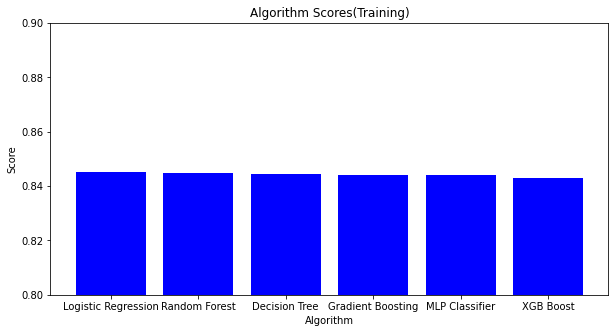

In [ ]:
# Draw a plot of the algorithm scores
score_by_training = [model_scores[x][0] for x in model_scores]
score_by_training.sort(reverse=True)
plt.figure(figsize=(10, 5))
plt.title('Algorithm Scores(Training)')
plt.xlabel('Algorithm')
plt.ylabel('Score')
# 2 decimal places
plt.bar([x for x in model_scores], score_by_training, color='blue')
plt.ylim(0.8, 0.9)
plt.show()


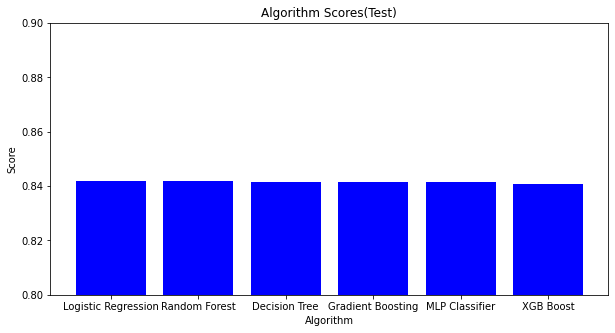

In [ ]:
score_by_test = [model_scores[x][1] for x in model_scores]
score_by_test.sort(reverse=True)
plt.figure(figsize=(10, 5))
plt.title('Algorithm Scores(Test)')
plt.xlabel('Algorithm')
plt.ylabel('Score')
# 2 decimal places
plt.bar([x for x in model_scores], score_by_test, color='blue')
plt.ylim(0.80, 0.9)
plt.show()


In [ ]:
# Predict the test set
logistic_prediction = logistic_regression.predict(x_test)
decision_tree_prediction = decision_tree.predict(x_test)
random_forest_prediction = random_forest.predict(x_test)
gradient_boosting_prediction = gradient_boosting.predict(x_test)
mlp_classifier_prediction = mlp_classifier.predict(x_test)
xgb_boost_prediction = xgb_boost.predict(x_test)



In [ ]:
reports = {}
reports['Decision Tree'] = classification_report(decision_tree_prediction, y_test, output_dict=True)
reports['Gradient Boosting'] = classification_report(gradient_boosting_prediction, y_test, output_dict=True)
reports['Random Forest'] = classification_report(random_forest_prediction, y_test, output_dict=True)
reports['MLP Classifier'] = classification_report(mlp_classifier_prediction, y_test, output_dict=True)
reports['Logistic Regression'] = classification_report(logistic_prediction, y_test, output_dict=True)
reports['XGB Boost'] = classification_report(xgb_boost_prediction, y_test, output_dict=True)

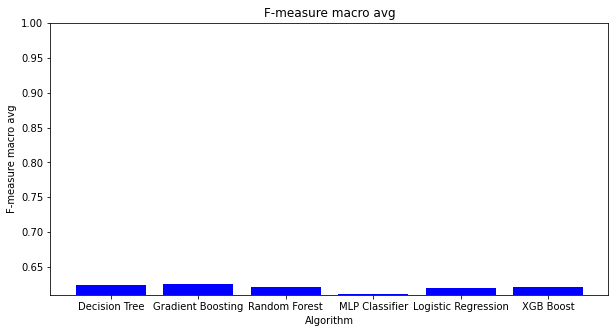

In [ ]:
f1_score_by_macro_avg = [reports[x]['macro avg']['f1-score'] for x in reports]

plt.figure(figsize=(10, 5))
plt.title('F-measure macro avg')
plt.xlabel('Algorithm')
plt.ylabel('F-measure macro avg')
plt.bar([x for x in reports], f1_score_by_macro_avg , color='blue')
plt.ylim(0.61, 1)
plt.show()

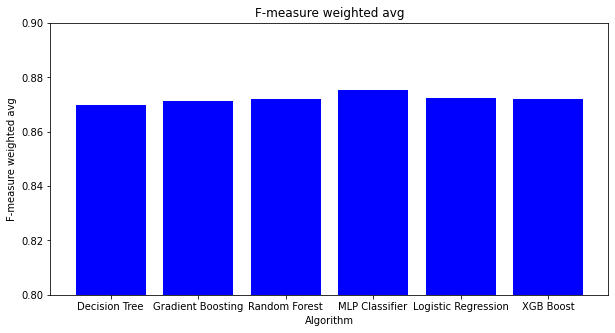

In [ ]:
f1_score_by_weigted_avg = [reports[x]['weighted avg']['f1-score'] for x in reports]

plt.figure(figsize=(10, 5))
plt.title('F-measure weighted avg')
plt.xlabel('Algorithm')
plt.ylabel('F-measure weighted avg')
plt.bar([x for x in reports], f1_score_by_weigted_avg, color='blue')
plt.ylim(0.8, 0.9)
plt.show()

In [ ]:
gradient_boosting.score(x_test, y_test)

0.8417519013899817

In [ ]:
reports

{'Decision Tree': {'0': {'precision': 0.9652760990434092,
   'recall': 0.8597022729369791,
   'f1-score': 0.9094354969904018,
   'support': 195078},
  '1': {'precision': 0.23917938453840382,
   'recall': 0.5878253740520598,
   'f1-score': 0.3400118553645525,
   'support': 14637},
  'accuracy': 0.8407267005221372,
  'macro avg': {'precision': 0.6022277417909065,
   'recall': 0.7237638234945194,
   'f1-score': 0.6247236761774771,
   'support': 209715},
  'weighted avg': {'precision': 0.9145983811395407,
   'recall': 0.8407267005221372,
   'f1-score': 0.8696927325602105,
   'support': 209715}},
 'Gradient Boosting': {'0': {'precision': 0.9668819283765584,
   'recall': 0.8596210233291202,
   'f1-score': 0.9101020416455604,
   'support': 195421},
  '1': {'precision': 0.23740027242654213,
   'recall': 0.5974534769833496,
   'f1-score': 0.33978554518869236,
   'support': 14294},
  'accuracy': 0.8417519013899817,
  'macro avg': {'precision': 0.6021411004015502,
   'recall': 0.7285372501562348,

In [ ]:
score_by_training.sort()

In [ ]:
import joblib
joblib.dump(gradient_boosting, 'gradient_boosting.pkl')
joblib.dump(decision_tree, 'decision_tree.pkl')
joblib.dump(random_forest, 'random_forest.pkl')
joblib.dump(mlp_classifier, 'mlp_classifier.pkl')
joblib.dump(xgb_boost, 'xgb_boost.pkl')
joblib.dump(logistic_regression, 'logistic_regression.pkl')